In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# raw_root = Path('/mnt/sds/sd20i001/mohamad/MeTra2/data/root')
root = Path('/mnt/hdd/data/MMMedViT_data')
labels = pd.read_csv(root / 'data/labels.csv', index_col=0)
labels

,itemid,mu,std,lower,upper,units
Troponin-T,227429,0.696529,1.341294,0.00,0.01,ng/mL
Potassium (serum),227442,4.082477,0.536100,3.30,5.10,mmol/L
Sodium (serum),220645,139.091866,5.054144,133.00,145.00,mmol/L
Hemoglobin,220228,9.901678,1.925150,12.00,16.00,g/dL (M)
Lactic Acid,225668,2.516121,2.037109,0.50,2.00,mmol/L
Creatinine (serum),220615,1.381867,1.216277,0.40,1.10,mg/dL (M)
CK (CPK),225634,1768.026382,4669.048034,NaN,NaN,U/L
Direct Bilirubin,225651,3.550476,3.930061,0.00,0.30,mg/dL
Total Bilirubin,225690,2.118487,3.384097,0.00,1.50,mg/dL
C Reactive Protein (CRP),227444,73.176000,77.640991,0.00,5.00,mg/L


In [2]:
colors = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown',
    'pink', 'gray', 'olive', 'cyan', 'navy', 'lime',
    'maroon', 'teal', 'magenta', 'gold', 'darkgreen', 'slateblue',
    'coral', 'orchid', 'darkorange', 'steelblue', 'chocolate', 'forestgreen',
    'turquoise', 'crimson', 'darkslategray', 'indigo', 'khaki', 'royalblue',
    'peru', 'mediumvioletred', 'darkkhaki', 'deepskyblue', 'saddlebrown', 'plum'
]

In [3]:
ylims = {
    'Troponin-T': [-0.6, 0.0],
    'Direct Bilirubin': [-1.5,1.5],
    'C Reactive Protein (CRP)': [-1.5,1.5],
    'D-Dimer': [-1.5,1.5],
    'Hemoglobin': [-3,4.5],
    'ALT': [-1.5,1.5]
}

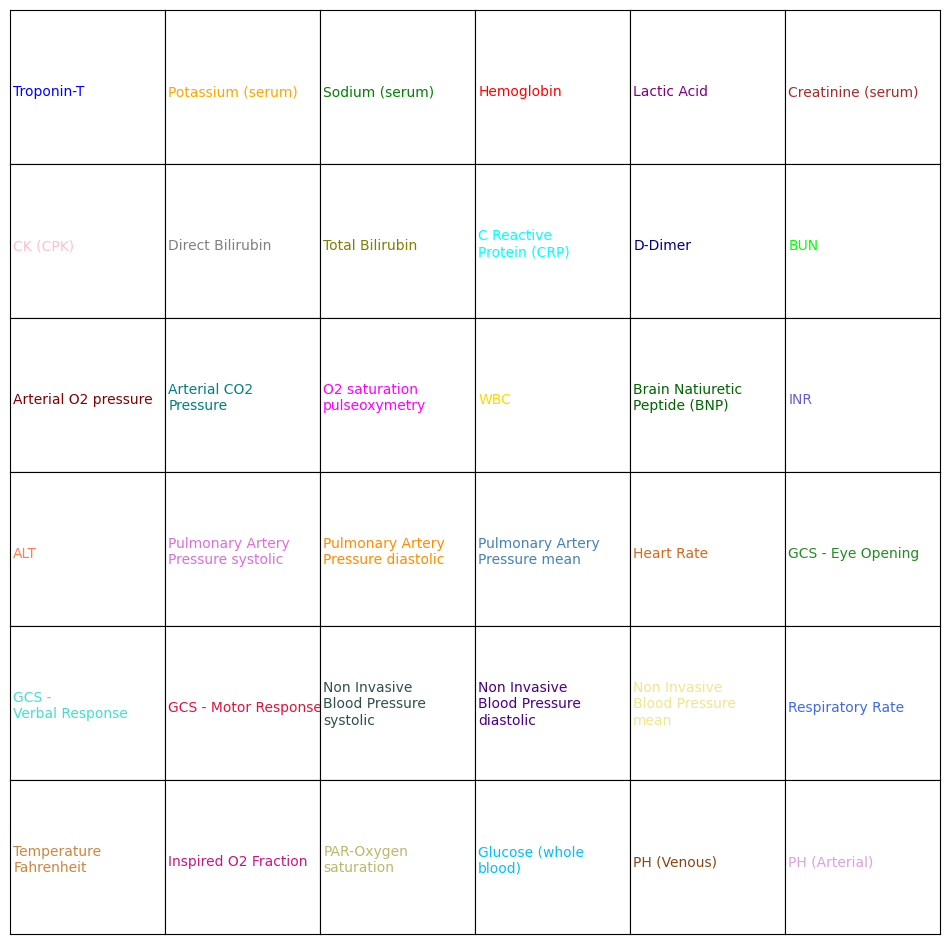

In [4]:
fig,axs = plt.subplots(6,6,figsize=(12,12))
for (label, statistics), (i,ax) in zip(labels.iterrows(), enumerate(axs.flatten())):
    ax.set_xlim([0,48])
    ax.set_ylim([0,5])
    ax.set_xticks([])
    ax.set_yticks([])
    y = 2.2
    if len(label) > 20:
        label = label.split(' ')
        if len(label) == 2:
            label = '\n'.join(label)
            y = 2.0
        elif len(label) > 4:
            label = f'{" ".join(label[:2])}\n{" ".join(label[2:4])}\n{" ".join(label[4:])}'
            y = 1.8
        else:
            label = f'{" ".join(label[:2])}\n{" ".join(label[2:])}'
            y = 2.0
    ax.text(1, y, label, fontsize=10, color=colors[i])
    # ax.set_facecolor('gray')
    # print(label, len(label), len(label.split(' ')))
fig.subplots_adjust(hspace=0.,wspace=0.)
# fig.savefig('images/lab_names.pdf', bbox_inches='tight')

0it [00:00, ?it/s]

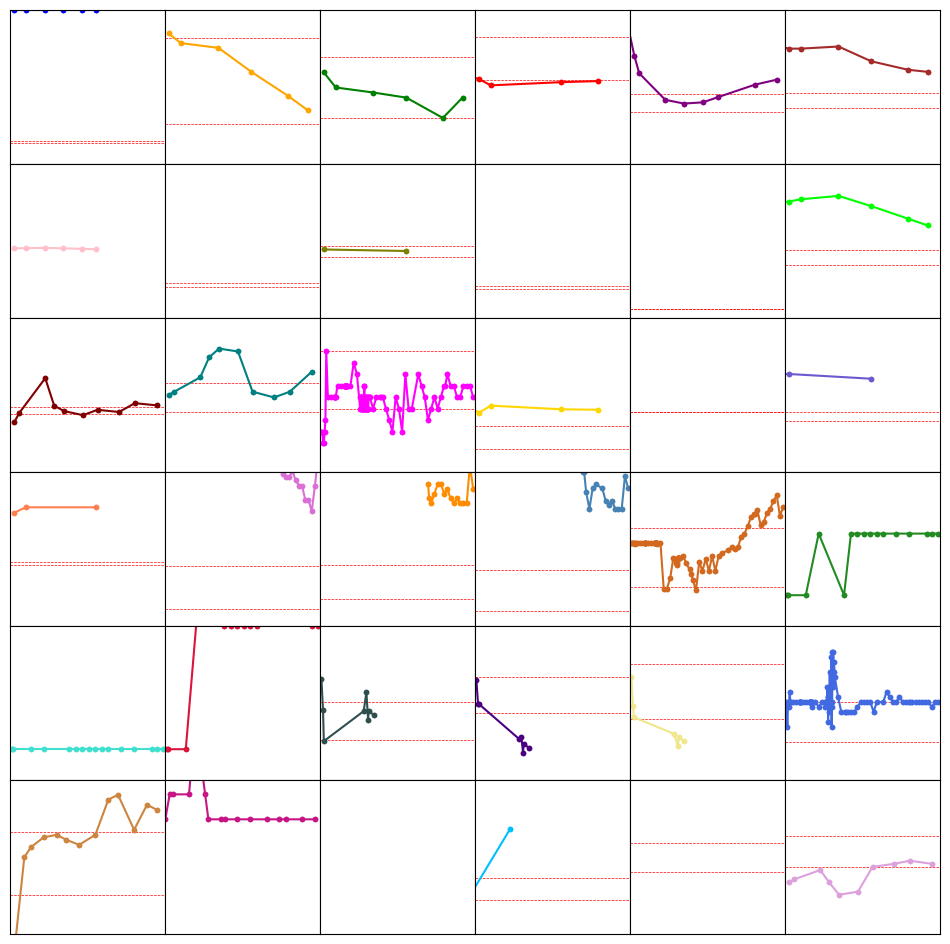

In [5]:
import numpy as np

# for fname in tqdm(raw_root.glob('*/*/additional_timeseries.csv')):
src = root / 'data' / 'labs_timeseries'
# for i, fname in tqdm(enumerate(src.glob('*/*.csv'))):
for i, fname in tqdm(enumerate(src.glob('*/30007565.csv'))):
    
    # if i == 7000: break
    stay_id = int(float(fname.stem))
    mode = fname.parent.name
    # subject_stays = pd.read_csv(fname.parent / 'stays.csv')
    # print(len(subject_stays))
    # stay_id = subject_stays.iloc[-1].stay_id
    dst = f'data/labs2/{mode}/{stay_id}.png'
    # if Path(dst).exists():
    #     continue
    data = pd.read_csv(fname).drop(columns=['index'])
    data = data[data.Hours<=48]
    data.set_index('Hours', inplace=True)
    fig,axs = plt.subplots(6,6,figsize=(12,12))
    for (label, statistics), (i,ax) in zip(labels.iterrows(), enumerate(axs.flatten())):
        values = pd.to_numeric(data[label], errors='coerce').dropna()
        if not np.isnan(statistics['mu']) :
            values = (values - statistics['mu']) / statistics['std']
            ax.axhline((statistics['lower']-statistics['mu'])/statistics['std'], linewidth=0.5, color='red', linestyle='dashed')
            ax.axhline((statistics['upper']-statistics['mu'])/statistics['std'], linewidth=0.5, color='red', linestyle='dashed')
        if label in ylims:
            values = np.clip(values, *ylims[label])
        ax.plot(values, color=colors[i], marker='.')
        ax.set_xlim([0,48])
        ax.set_xticks([])
        ax.set_yticks([])

        if label in ylims:
            ax.set_ylim(ylims[label])
            # print(label, ax.get_ylim())
        elif 'gcs' in label.lower():
            ax.set_ylim([0,5])
        else:
            ax.set_ylim([-3,3])
        
        # ax.set_title(label, fontsize=5)
    fig.subplots_adjust(hspace=0.,wspace=0.)
    # fig.savefig(dst, bbox_inches='tight', dpi=72)
    # plt.close(fig)
    break

In [7]:
fig.savefig('images/lab30007565.pdf', bbox_inches='tight')